# Test

This notebook is only to test our the functionnality / debug of the others .py files

In [1]:
%load_ext autoreload
%autoreload 2
from board import *
from candy import *

In [2]:
b = Board(5,6)
print("Empty Board")
b.display()
print("Random Board")
b.fill_random()
b.display()
print("nothing to merge ?", b.check_if_merged_all())

if b.check_if_merged_all():
    print("merging")
    b.update()
    b.display()



Empty Board
|           |
|           |
|           |
|           |
|           |

Random Board
|6 6 2 3 6 3|
|5 3 4 2 4 6|
|5 2 5 2 3 3|
|4 1 6 1 3 4|
|3 3 1 6 6 3|

nothing to merge ? set()


In [3]:
import time

# Assuming b is an instance of Board and get_legal_moves is a method of Board
start_time = time.time()
legal_moves = b.get_legal_moves()
end_time = time.time()
runtime = end_time - start_time
print(f"Runtime of b.get_legal_moves(): {runtime} seconds")
print("Legal moves:")
for move in legal_moves:
    print(move)
    b.display_move(move)


Runtime of b.get_legal_moves(): 0.0004820823669433594 seconds
Legal moves:
((0, 2), (0, 3))
|6 6 2 3 6 3|
|5 3 4 2 4 6|
|5 2 5 2 3 3|
|4 1 6 1 3 4|
|3 3 1 6 6 3|

((3, 2), (4, 2))
|6 6 2 3 6 3|
|5 3 4 2 4 6|
|5 2 5 2 3 3|
|4 1 6 1 3 4|
|3 3 1 6 6 3|

((3, 4), (3, 5))
|6 6 2 3 6 3|
|5 3 4 2 4 6|
|5 2 5 2 3 3|
|4 1 6 1 3 4|
|3 3 1 6 6 3|



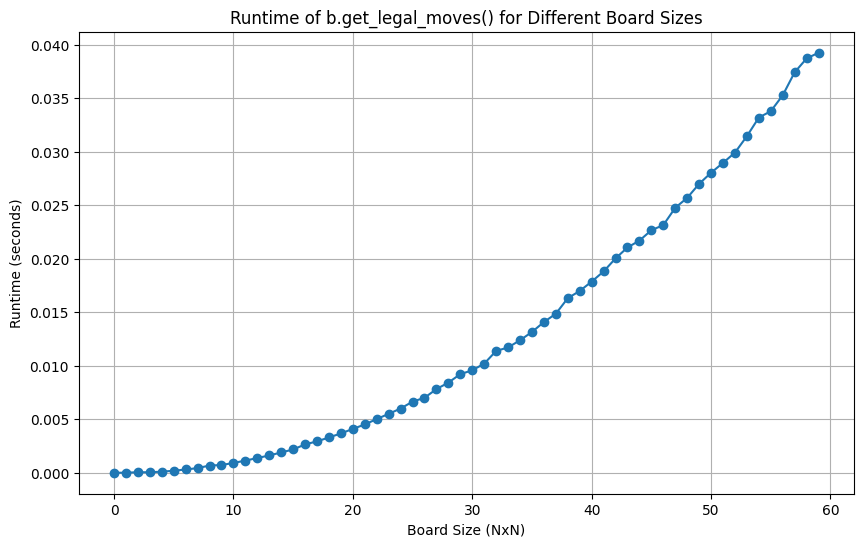

In [4]:
import time
import matplotlib.pyplot as plt
from board import Board, Action

def measure_runtime(board_sizes):
    runtimes = {}
    for size in board_sizes:
        b = Board(size, size)
        b.fill_random()
        a = Action(b)
        
        start_time = time.time()
        legal_moves = b.get_legal_moves()
        end_time = time.time()
        
        runtime = end_time - start_time
        runtimes[size] = runtime
    return runtimes

# List of board sizes to test
board_sizes = range(60)

# Measure and print runtimes
runtimes = measure_runtime(board_sizes)

# Plot the results
sizes = list(runtimes.keys())
times = list(runtimes.values())

plt.figure(figsize=(10, 6))
plt.plot(sizes, times, marker='o')
plt.title('Runtime of b.get_legal_moves() for Different Board Sizes')
plt.xlabel('Board Size (NxN)')
plt.ylabel('Runtime (seconds)')
plt.grid(True)
plt.show()

In [5]:
action = Action(b)
b.fill_random()
b.display()
print("Swapping (0,0) and (0,1)")
action.swap(0,0, 0,1)
b.display()
print("Swapping (0,1) and (0,2)")
action.raw_swap(0,1, 0,2)
b.display()

# Show what happens when we swap two candies that don't match
try: 
    action.raw_swap(0,4, 0,1)
except Exception as e:
    print(e)
b.display()

|6 6 2 3 6 3|
|5 3 4 2 4 6|
|5 2 5 2 3 3|
|4 1 6 1 3 4|
|3 3 1 6 6 3|

Swapping (0,0) and (0,1)
|6 6 2 3 6 3|
|5 3 4 2 4 6|
|5 2 5 2 3 3|
|4 1 6 1 3 4|
|3 3 1 6 6 3|

Swapping (0,1) and (0,2)
|6 2 6 3 6 3|
|5 3 4 2 4 6|
|5 2 5 2 3 3|
|4 1 6 1 3 4|
|3 3 1 6 6 3|

Can only swap adjacent candies.
|6 2 6 3 6 3|
|5 3 4 2 4 6|
|5 2 5 2 3 3|
|4 1 6 1 3 4|
|3 3 1 6 6 3|



In [6]:
b.empty()
b.fill_random()
b.display()

up=b.update()
if up:
    print("something was merged")
    b.display()



print("Swapping (2,3) and (2,4)")
sw=action.swap(2,3, 2,4)
if sw==False:
    print("No match")
else:
    b.display()
    b.update()
    print("After update")
    b.display()

|4 3 4 5 1 6|
|1 6 5 1 4 5|
|3 6 3 6 2 3|
|6 2 6 4 4 1|
|5 6 1 2 3 2|

Swapping (2,3) and (2,4)
No match


## Tester la vizu (stylééé)

Commandes: 

-clicker pour selectionner le premier candy

-Fleches pour selectionner le 2e

-s pour générer une nouvelle grille si bloqué

-q pour quitter (moi ca marche pas, je dois stopper la cellule dans le notebook)

In [7]:
from Viz import *

pygame 2.6.1 (SDL 2.28.4, Python 3.9.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [33]:
## Write a function that takes a text file with first matrix being candy ids and second matrix being candy types and returns a board object

def read_board_from_file(file_path):
    """
    Read a board from a text file and return the corresponding Board object.
    """
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Extract board dimensions from the first line
    dimensions = lines[0].strip().split(' ')
    N = int(dimensions[0])
    M = int(dimensions[1])

    # Initialize the board
    board = Board(N, M)

    # Read the board state from the file
    for i in range(1, N + 1):
        line = lines[i].strip().split(' ')
        for j in range(M):
            candy_id, candy_type = line[j].split('_')
            board.board[i - 1, j] = Candy(int(candy_id), candy_type)

    return board

In [9]:
b=read_board_from_file("study_board.txt")
b.display()

|4 6 1 1 2 4 6|
|6 2 1 1 3 4 4|
|2 3 2 2 4 6 2|
|5 5 1 6 2 4 4|
|2 3 1 3 2 6 3|
|6 4 6 6 3 6 4|



In [10]:
# Create a specific board to test stuff
b = Board(5,5)
b.fill_random()

# Fill other stuff with other ids
for i in range(5):
    for j in range(5):
        if b.board[i][j].id == 1 or b.board[i][j].id == 2:
            b.board[i][j] = Candy(random.randint(3,6),type="normal")
b.board[0][2] = Candy(1,type="normal")
b.board[1][2] = Candy(1,type="normal")
b.board[3][2] = Candy(1,type="normal")
b.board[4][2] = Candy(1,type="normal")
b.board[2][2] = Candy(2,type="normal")
b.board[2][3] = Candy(2,type="normal")
b.board[1][1] = Candy(2,type="normal")
a=Action(b)
v=Viz(b,a) 
v.Visualize()   



SystemExit: 

/Users/alexisbonnafont/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3558: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
# Normal play
b = Board(8,9)
b.fill_random()
b.update()
a=Action(b)
b.fill_random()
v = Viz(b,a)
v.Visualize()

KeyboardInterrupt: 

## MCTS

In [1]:
# Setup autoreload


%load_ext autoreload 
%autoreload 2


In [54]:
from board import *
from mcts import MCTS_CandyCrush
from mctsviz import visualize_root_moves
# Set the random seed
np.random.seed(32)

b = Board(10,10)
b.fill_random()
b.update()
b.display()


|4 6 5 1 4 5 2 4 6 3|
|2 5 4 2 4 2 3 4 1 3|
|3 3 5 3 5 5 2 6 2 6|
|4 4 1 3 6 5 6 3 1 4|
|5 2 1 4 3 6 3 4 6 3|
|6 1 4 4 6 4 4 3 3 2|
|4 2 5 5 1 5 3 2 4 3|
|3 1 3 2 6 6 3 4 1 5|
|6 2 2 1 4 2 5 4 1 3|
|3 2 1 5 2 5 1 2 2 3|



In [55]:
b.display()

|4 6 5 1 4 5 2 4 6 3|
|2 5 4 2 4 2 3 4 1 3|
|3 3 5 3 5 5 2 6 2 6|
|4 4 1 3 6 5 6 3 1 4|
|5 2 1 4 3 6 3 4 6 3|
|6 1 4 4 6 4 4 3 3 2|
|4 2 5 5 1 5 3 2 4 3|
|3 1 3 2 6 6 3 4 1 5|
|6 2 2 1 4 2 5 4 1 3|
|3 2 1 5 2 5 1 2 2 3|



|4_N 6_N 5_N 1_N 4_N 5_N 2_N 4_N 6_N 3_N|
|2_N 5_N 4_N 2_N 4_N 2_N 3_N 4_N 1_N 3_N|
|3_N 3_N 5_N 3_N 5_N 5_N 2_N 6_N 2_N 6_N|
|4_N 4_N 1_N 3_N 6_N 5_N 6_N 3_N 1_N 4_N|
|5_N 2_N 1_N 4_N 3_N 6_N 3_N 4_N 6_N 3_N|
|6_N 1_N 4_N 4_N 6_N 4_N 4_N 3_N 3_N 2_N|
|4_N 2_N 5_N 5_N 1_N 5_N 3_N 2_N 4_N 3_N|
|3_N 1_N 3_N 2_N 6_N 6_N 3_N 4_N 1_N 5_N|
|6_N 2_N 2_N 1_N 4_N 2_N 5_N 4_N 1_N 3_N|
|3_N 2_N 1_N 5_N 2_N 5_N 1_N 2_N 2_N 3_N|

|4_N 6_N 5_N 1_N 4_N 4_N 2_N 4_N 6_N 3_N|
|2_N 5_N 4_N 2_N 4_N 6_N 3_N 4_N 1_N 3_N|
|3_N 3_N 5_N 3_N 5_N 5_N 2_N 6_N 2_N 6_N|
|4_N 4_N 1_N 3_N 6_N 2_N 6_N 3_N 1_N 4_N|
|5_N 2_N 1_N 4_N 3_N 6_N 3_N 4_N 6_N 3_N|
|6_N 1_N 4_N 4_N 6_N 4_N 4_N 3_N 3_N 2_N|
|4_N 2_N 5_N 5_N 1_N 5_N 3_N 2_N 4_N 3_N|
|3_N 1_N 3_N 2_N 6_N 6_N 3_N 4_N 1_N 5_N|
|6_N 2_N 2_N 1_N 4_N 2_N 5_N 4_N 1_N 3_N|
|3_N 2_N 1_N 5_N 2_N 5_N 1_N 2_N 2_N 3_N|

|4_N 6_N 5_N 1_N 1_N 4_N 5_N 2_N 6_N 3_N|
|2_N 5_N 4_N 2_N 4_N 6_N 3_N 4_N 1_N 3_N|
|3_N 3_N 5_N 3_N 5_N 5_N 2_N 6_N 2_N 6_N|
|4_N 4_N 1_N 3_N 6_N 2_N 6_N 3_N

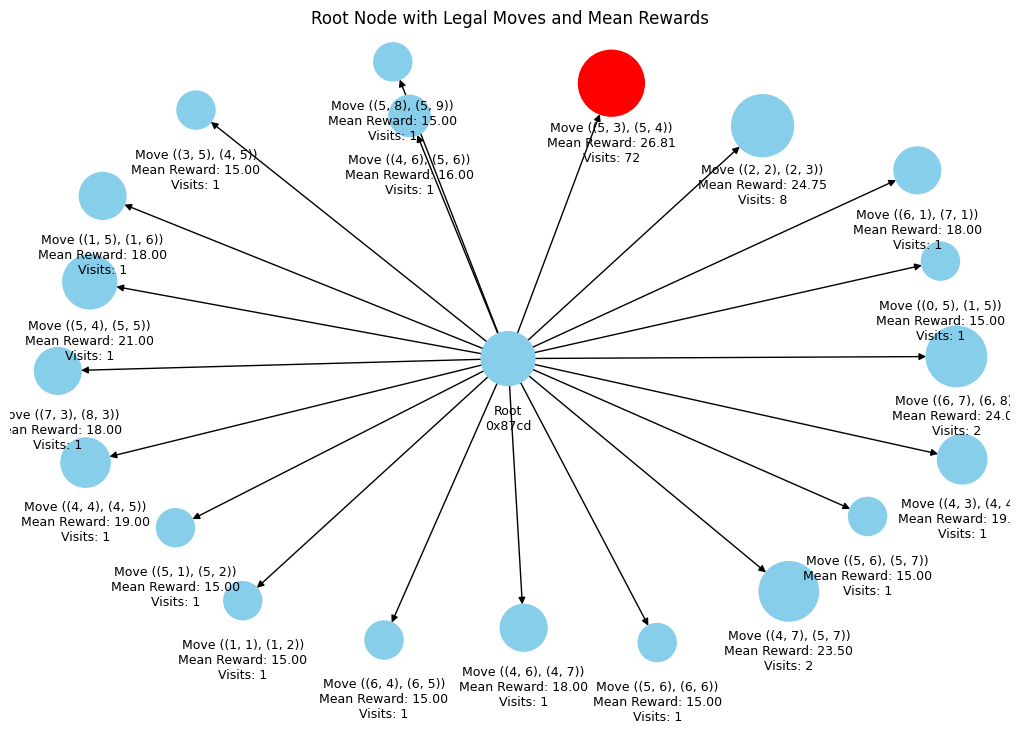

In [56]:
# Huge explo param to see the effect of exploration
np.random.seed(32)
mcts = MCTS_CandyCrush(b, exploration_param=1, max_depth=5, n_simulation=100, write_log_file=True, no_log=False)
best_move = mcts.best_move()  
visualize_root_moves(mcts)

In [6]:
b.display_move(best_move)

|4 5 3 5 5 4 3|
|3 3 5 4 3 6 5|
|2 4 6 6 2 2 5|
|1 4 2 6 5 2 1|
|1 3 3 2 4 6 6|
|6 6 3 4 4 1 3|
|5 3 5 1 2 4 1|



Make sense! It's aligning a 4 5 column, and put the 4 close to a 4 column in the same time

In [31]:
# Bug analysis

In [48]:
b=read_board_from_file("bug_board.txt")
b.display_with_type()

|4_N 1_N 5_N 4_N 6_N 5_N 3_N 4_N 2_N 6_N|
|4_N 5_N 6_N 1_N 5_N 6_N 1_N 5_N 1_N 4_N|
|5_N 1_N 6_N 1_N 3_N 4_N 6_S 3_N 2_N 3_N|
|3_N 2_N 4_N 2_N 3_N 4_N 6_S 2_N 3_N 5_N|
|1_N 3_N 4_N 4_N 2_N 6_N 2_N 3_N 4_N 5_N|
|6_N 2_N 5_N 3_N 6_N 3_N 1_N 2_N 1_N 4_N|
|4_N 5_N 2_N 1_N 5_N 3_N 4_N 6_N 4_N 3_N|
|6_N 6_N 3_N 6_N 2_N 4_N 6_N 3_N 2_N 6_N|
|2_N 4_N 2_N 4_N 1_N 4_N 4_N 2_N 4_N 2_N|
|2_N 5_N 2_N 1_N 6_N 5_N 1_N 6_N 1_N 5_N|



In [45]:
b.display_move((((1,5),(1,6))))

|4 1 5 4 6 5 3 4 2 6|
|4 5 6 1 5 6 1 5 1 4|
|5 1 6 1 3 4 6 3 2 3|
|3 2 4 2 3 4 6 2 3 5|
|1 3 4 4 2 6 2 3 4 5|
|6 2 5 3 6 3 1 2 1 4|
|4 5 2 1 5 3 4 6 4 3|
|6 6 3 6 2 4 6 3 2 6|
|2 4 2 4 1 4 4 2 4 2|
|2 5 2 1 6 5 1 6 1 5|



In [47]:
Action(b).swap(1,5,1,6)

AxisError: axis 1 is out of bounds for array of dimension 0

In [39]:
b.display()

|4 5 6 1 3 5 6 4 1 4|
|4 3 3 1 6 4 4 2 2 3|
|5 1 6 5 5 4 6 3 3 5|
|3 2 4 2 3 6 2 2 4 5|
|1 3 4 4 2 3 1 6 1 4|
|6 2 5 3 6 3 4 1 4 3|
|4 5 2 1 5 1 1 3 2 6|
|6 6 3 6 2 4 6 2 4 2|
|2 4 2 4 1 4 4 6 5 5|
|2 5 2 1 6 5 1 5 1 5|



In [ ]:
|4_N 6_N 5_N 1_N 4_N 5_N 2_N 4_N 6_N 3_N|
|2_N 5_N 4_N 2_N 4_N 2_N 3_N 4_N 1_N 3_N|
|3_N 3_N 5_N 3_N 5_N 5_N 2_N 6_N 2_N 6_N|
|4_N 4_N 1_N 3_N 6_N 5_N 6_N 3_N 1_N 4_N|
|5_N 2_N 1_N 4_N 3_N 6_N 3_N 4_N 6_N 3_N|
|6_N 1_N 4_N 4_N 6_N 4_N 4_N 3_N 3_N 2_N|
|4_N 2_N 5_N 5_N 1_N 5_N 3_N 2_N 4_N 3_N|
|3_N 1_N 3_N 2_N 6_N 6_N 3_N 4_N 1_N 5_N|
|6_N 2_N 2_N 1_N 4_N 2_N 5_N 4_N 1_N 3_N|
|3_N 2_N 1_N 5_N 2_N 5_N 1_N 2_N 2_N 3_N|